# Matrix Analysis 2022 - EE312
## Week 11 - Singular Value Decomposition
[LTS2](https://lts2.epfl.ch)

## 1. SVD
Compute the SVD of the matrix $A=\begin{pmatrix}1 & 0 & 0 & 1\\0 & 1 & 1 & 0\end{pmatrix}$.

**Answer**
$AA^T=\begin{pmatrix}2&0\\0&2\end{pmatrix}$, clearly its eigenvalue is 2 with multiplicity 2. Therefore $\sqrt{2}$ is a singular value of $A$ with multiplicity 2. An orthonormal basis of eigenvectors $AA^T$ is $\begin{pmatrix}1 & 0\\ 0 & 1\end{pmatrix}$.

$A^TA = \begin{pmatrix}1 & 0 & 0 & 1\\ 0 & 1 & 1 & 0\\ 0 & 1 & 1 & 0\\ 1 & 0 & 0 & 1\end{pmatrix}$. Using the relation $A^Tu_i=\sigma_i v_i$, this yields:

$v_1 = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 0 \\ 0 & 1\\0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 0 \\ 0 \\ 1\end{pmatrix}$.

$v_2 = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 0 \\ 0 & 1\\0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}0 \\ 1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}0 \\ 1 \\ 1 \\ 0\end{pmatrix}$.

We can then choose $v_3$ and $v_4$ to be orthogonal to $v_1$ and $v_2$, e.g. $v_3 = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 0 \\ 0 \\ -1\end{pmatrix}$ and $v_4 = \frac{1}{\sqrt{2}}\begin{pmatrix}0 \\ 1 \\ -1 \\ 0\end{pmatrix}$.

Therefore $A=U\Sigma V^T$ with $U = \begin{pmatrix}1 & 0\\ 0 & 1\end{pmatrix}$, 
$\Sigma = \begin{pmatrix}\sqrt{2} & 0 & 0 & 0\\ 0 & \sqrt{2} & 0 & 0\end{pmatrix}$ and $V=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\\ 0 & 1 & 0 & -1 \\ 1 & 0 & -1 & 0\end{pmatrix}$.

---

## 2. PCA and SVD
As you remember from last week's exercise session, Principal Component Analysis (PCA) relies on the computation of eigenvalues and eigenvectors of the sample covariance matrix. 

Let us consider $N$ data points $\{x_k\}, k=1, ..., N$ in $\mathbb{R}^d$. We will denote by $X$ the $N\times d$ matrix s.t. :

$
X = \begin{pmatrix}
x_1^T\\
x_2^T\\ \vdots \\ x_N^T \end{pmatrix}$

The sample covariance matrix is defined by $C = \frac{1}{N}X^TX$.

### 2.1 
Using the SVD of $X$, find a relationship between the eigenvalues/eigenvectors of $C$ and the singular values/singular vectors of $X$.

**Answer**

$X=U\Sigma V^T$, therefore $X^TX = (U\Sigma V^T)^TU\Sigma V^T = V\Sigma U^TU\Sigma V^T$. Since $U$ is orthogonal $U^TU=I$ and $X^TX = V\Sigma^2V^T$.

Since $\Sigma$ is a diagonal matrix, so is $\Sigma^2$. This shows the eigenvalues $\lambda_i$ of $C$ are related to the singular values $\sigma_i$ by the following relationship: $\lambda_i = \frac{\sigma_i^2}{N}$, and the right singular vectors of $V$ are the eigenvectors of $C$.


---

### 2.2

Let us load last week's dataset and use the SVD to perform the PCA.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True)
mean_face = np.mean(faces, axis=0)
faces_zero_centered = faces - mean_face

Check the [svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) function in Numpy and use it to compute the eigenvalues and eigenvectors of $C$.

In [3]:
u,s,vh = np.linalg.svd(faces_zero_centered, full_matrices=False)
eigen_vals = s*s/400
eigen_vecs = vh.T

In [4]:
vh.shape

(400, 4096)

What is the interest of using SVD vs. computing explicitely $C$ and its eigenvalues/eigenvectors ?

**Answer** 

The computation of the eigenvalues of $C$ is quite intensive and may require several minutes depending on your system. The SVD should be computed in only a few seconds.

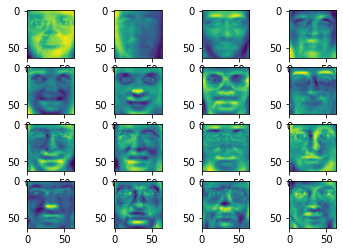

In [5]:
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(eigen_vecs[:, k], (64, 64)))

In [6]:
C = faces_zero_centered.T@faces_zero_centered/400

In [9]:
# be careful before running it !
# ca. 19s on google colab
%timeit eig_vals, eig_vecs = np.linalg.eigh(C)

9.61 s ± 640 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# < 1s for full_matrices=False, ca. 4s otherwise on google colab
%timeit u,s,vh = np.linalg.svd(faces_zero_centered, full_matrices=False)

471 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

### 2.3
Compute a low-rank $k<<d$ approximation $X_k$ of $X$. You can plot the singular values to choose $k$. What is the relationship between $X_k$ and the PCA ?

**Answer**


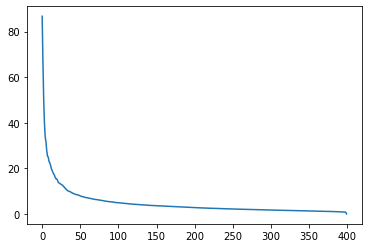

In [13]:
plt.plot(s)

In [14]:
k=150 # > ca. 100 to 150 seems a valid choice
u_k = u[:, :k]
s_k = s[:k]
vh_k = vh[:k, :]
X_k = u_k@np.diag(s_k)@vh_k

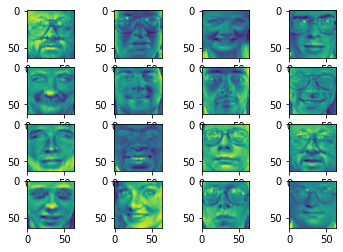

In [15]:
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(X_k[k, :], (64, 64)))

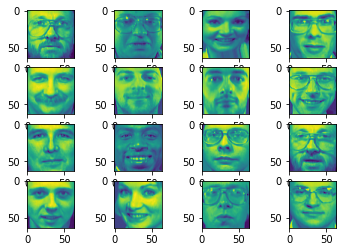

In [16]:
# compare witht the originals
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(faces[k, :], (64, 64)))

In [17]:
def pca(input_data, eig_vectors, n):
    W = eig_vectors[:, 0:n]
    return input_data@W

def pca_approx(pca_projection, eig_vectors, n):
    W = eig_vectors[:, 0:n]
    return pca_projection@W.T

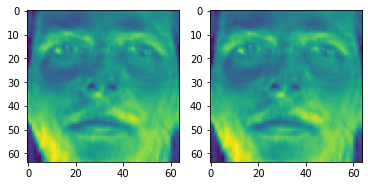

In [18]:
n = 150
cc = pca(faces_zero_centered, eigen_vecs, n)
approx = pca_approx(cc, eigen_vecs, n)
plt.subplot(121)
plt.imshow(np.reshape(X_k[42, :], (64, 64)))
plt.subplot(122)
plt.imshow(np.reshape(approx[42,:], (64, 64)))

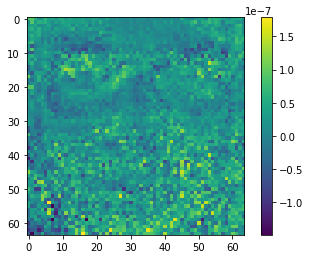

In [19]:
plt.imshow(np.reshape(X_k[42,:]-approx[42,:], (64, 64)))
plt.colorbar()

The rows of $X_k$ are an approximation of the input images, just like the PCA. In fact they are exactly the same. 

If we write the covariance matrix $C = V\Lambda V^T$ (as seen in question 2.1 $V$ is the same $V$ obtained when performing the SVD decomposition of $X$), with $\Lambda$ being a diagonal matrix, the full decomposition of $X$ on the principal components is $(XV)V^T$. Using the SVD, $X=U\Sigma V^T$, therefore $XV = U\Sigma$. If keep only $k$ components, the PCA approximation will be $(XV_k)V_k^T$ where $V_k$ is the matrix formed by the eigenvectors associated to the $k$ largest eigenvalues.

If we use the SVD of $X$, we can write $XV_k = U\Sigma V^TV_k$. $V_k$ is a "submatrix" of $V$, which is an orthogonal matrix. Therefore $V^TV_k$ will be a $d\times k$ matrix :

$V^TV_k = \begin{pmatrix}I_k\\ 0\end{pmatrix}$.

Therefore 
$\Sigma V^TV_k = 
\begin{pmatrix}
\sigma_1 & 0 & ... &0\\ 
0 & \sigma_2 & ... &0\\ 
  &  & \ddots & \\
  &  & & \sigma_k\\
0  &         & ...  & 0  \\
\vdots &    & & \vdots \\
0 & & ...& 0
  \end{pmatrix}$.
  
Therefore $U\Sigma V^TV_k$ will be a matrix containing the $k$ first column vectors of $U$ multiplied by the corresponding $\sigma_i$, i.e. $U_k\Sigma_k$. Finally, the PCA approximation can be written $U_k\Sigma_k V_k^T$ which corresponds to the low-rank approximation.

## 3. An application of SVD to video
In this exercise you will use the SVD on video data, acquired from a surveillance camera. The video is parti of the [BMC 2012 dataset]|(http://backgroundmodelschallenge.eu). In order to make things easier for you, the data has been preprocessed (reduced in size and converted to grayscale) and made available as a Numpy 3D array

In [20]:
import requests
r=requests.get('https://os.unil.cloud.switch.ch/swift/v1/lts2-ee312/video.npz', allow_redirects=True)
with open('video.npz', 'wb') as f: # save locally
    f.write(r.content)
video = np.load('video.npz')['data']

The `video` variable is a 3D array, i.e. a sequence of 2D arrays, each 2D array being a frame of the video. Let us display a few of these frames 

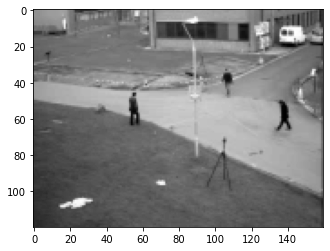

In [21]:
plt.imshow(video[0], cmap='gray')

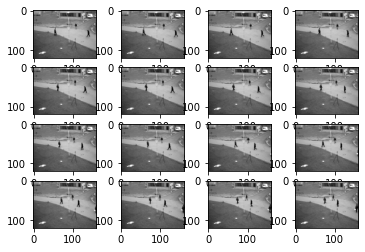

In [22]:
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(video[k], (120, 160)), cmap='gray')

### 3.1
Each frame is made of 120x160 pixels, coded on a single byte (i.e. with values between 0 and 255). Convert this 3D matrix to a 2D one (using the [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) function should help) and rescale its values s.t. they are between 0 and 1. 

**Answer**

In [23]:
video.shape

(791, 120, 160)

In [24]:
video_2d = np.reshape(video, (791, 120*160))/256.

In [25]:
video_2d.shape

(791, 19200)

### 3.2
Remembering what you saw in the previous exercise, what could a possible application of the SVD in this case ? (Hint: using the `full_matrices=False` option when calling `svd`might speed up things)

**Answer**
From the previous exercise, it might be interesting to have a look at the right singular vector associated with the largest eigenvalues. Let us compute those and display them:

In [26]:
u,s,v = np.linalg.svd(video_2d, full_matrices=False)

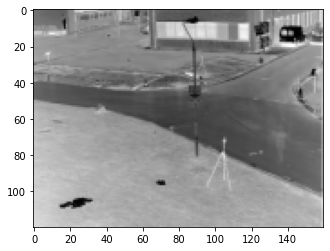

In [36]:
plt.imshow(np.reshape(v[0, :], (120, 160)), cmap='gray')

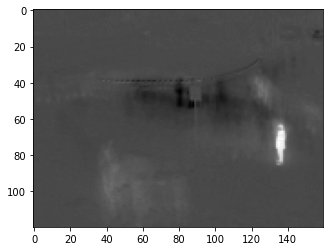

In [28]:
plt.imshow(np.reshape(v[1, :], (120, 160)), cmap='gray')

The first right singular vector is quite interesting: it contains the background of the scene without any moving character. It can be used for change detection (for a surveillance application). The other singular vectors contain information about parts of the video that changed through time.

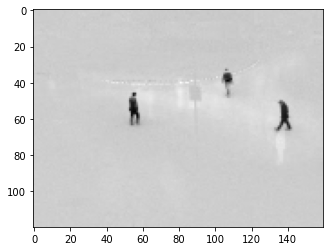

In [41]:
plt.imshow(np.reshape(video_2d[0, :]+np.linalg.norm(video_2d[0, :])*v[0,:], (120, 160)), cmap='gray')

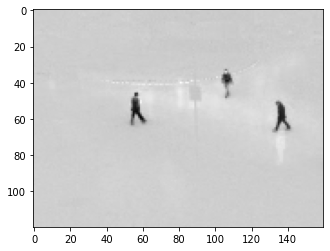

In [42]:
plt.imshow(np.reshape(video_2d[1, :]+np.linalg.norm(video_2d[1, :])*v[0,:], (120, 160)), cmap='gray')